#<center>
# מטלה מסכמת
</center>

Question 1:

In [97]:
# a :

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_pickle('TrainData.pkl')
images = data['X']  # Shape: (28, 28, 24000)
labels = data['Y']  # Shape: (24000,)

class_names = ['T-shirt/top', 'Trouser', 'Coat', 'Sandal', 'Ankle boot']

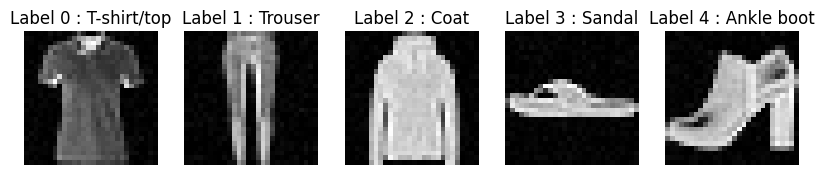

In [98]:
# b :

unique_labels = np.unique(labels)
plt.figure(figsize=(10, 2))

for i, label in enumerate(unique_labels): 
    index = np.where(labels == label)[0][0]
    image = images[:, :, index]
    plt.subplot(1, len(unique_labels), i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label {label} : {class_names[label]}') 
    plt.axis('off')

plt.show()

In [99]:
# c :

reshaped_images = images.reshape(images.shape[0]*images.shape[1], images.shape[2]).T

Question 2 :

In [100]:
# a :

def MximumLikelihood(X, Y):
    X = X.astype(np.float64)    # Convert to float64

    num_samples, num_features = X.shape
    num_classes = np.unique(Y).size

    pi = np.zeros(num_classes)
    mu = np.zeros((num_classes, num_features))
    sigma_square = np.zeros((num_classes, num_features))

    for c in range(num_classes):        
        pi[c] = X[Y == c].shape[0] / num_samples
        mu[c] = np.mean(X[Y == c], axis=0)
        sigma_square[c] = np.sum((X[Y == c] - mu[c]) ** 2, axis=0) / X[Y == c].shape[0]

    return pi, mu, np.sqrt(sigma_square)

In [101]:
# b :

def pdf(x, mu, sigma):
    sigma = np.maximum(sigma, 1e-8)
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def classify_images(X, mu, sigma):
    predicted_labels = []
    for image in X:
        log_likelihood = []
        for i in range(len(mu)):
            log_likelihood.append(np.sum(np.log(pdf(image, mu[i], sigma[i]) + 1e-20)))
        predicted_labels.append(unique_labels[np.argmax(log_likelihood)])
    return np.array(predicted_labels)

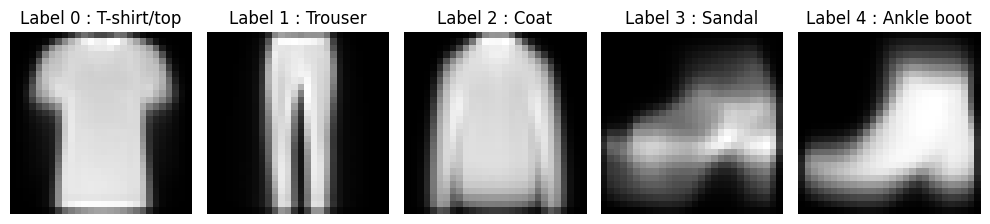

In [102]:
# c :

pi, mu, sigma = MximumLikelihood(reshaped_images, labels)

def visualize_mean_images(mu):
    num_classes = mu.shape[0] 
    plt.figure(figsize=(10, 10))

    for c in range(num_classes):
        plt.subplot(1, num_classes, c + 1)
        mean_image = mu[c].reshape(28, 28) 
        plt.imshow(mean_image, cmap='gray') 
        plt.title(f'Label {c} : {class_names[c]}')  
        plt.axis('off')  
        
    plt.tight_layout()
    plt.show()

visualize_mean_images(mu)


Question 3 :

In [103]:
# a :

def calculate_accuracy(labels, predicted_labels):
    return np.sum(labels == predicted_labels) / len(labels)

predictions = classify_images(reshaped_images, mu, sigma)
accuracy = calculate_accuracy(labels, predictions)
print(f'Classifier accuracy for TrainData: {accuracy:.4f}')

Classifier accuracy for TrainData: 0.9108


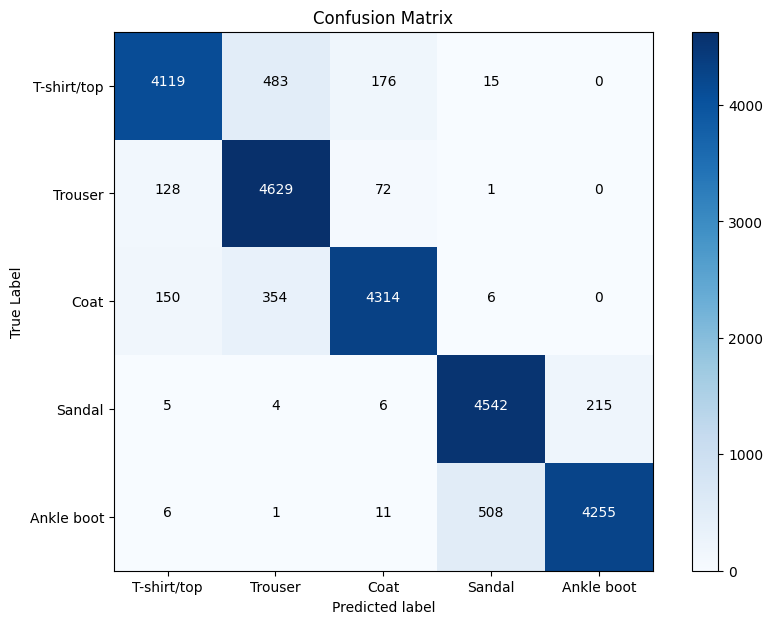

In [110]:
# b :

num_classes = len(np.unique(labels))
labels = np.asarray(labels, dtype=int)
predictions = np.asarray(predictions, dtype=int)

def calculate_confusion_matrix(labels, predicted_labels, num_classes):
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(labels, predicted_labels):
        conf_matrix[t, p] += 1
    return conf_matrix

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 7))
    plt.imshow(conf_matrix, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # Print the confusion matrix values
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, conf_matrix[i, j], 
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')
    plt.show()

conf_matrix = calculate_confusion_matrix(labels, predictions, num_classes)
plot_confusion_matrix(conf_matrix, class_names)

Question 4 :

In [105]:
test_data = pd.read_pickle('TestData.pkl')
test_images = test_data['X']  # Shape: (28, 28, 6000)
test_labels = test_data['Y']  # Shape: (6000,)

test_reshaped_images = test_images.reshape(test_images.shape[0]*test_images.shape[1], test_images.shape[2]).T

In [112]:
# a :

test_pi, test_mu, test_sigma = MximumLikelihood(test_reshaped_images, test_labels)

test_predictions = classify_images(test_reshaped_images, test_mu, test_sigma)
test_accuracy = calculate_accuracy(test_predictions, test_labels)
print(f'Classifier accuracy for TestData: {test_accuracy:.4f}')

Classifier accuracy for TestData: 0.9077


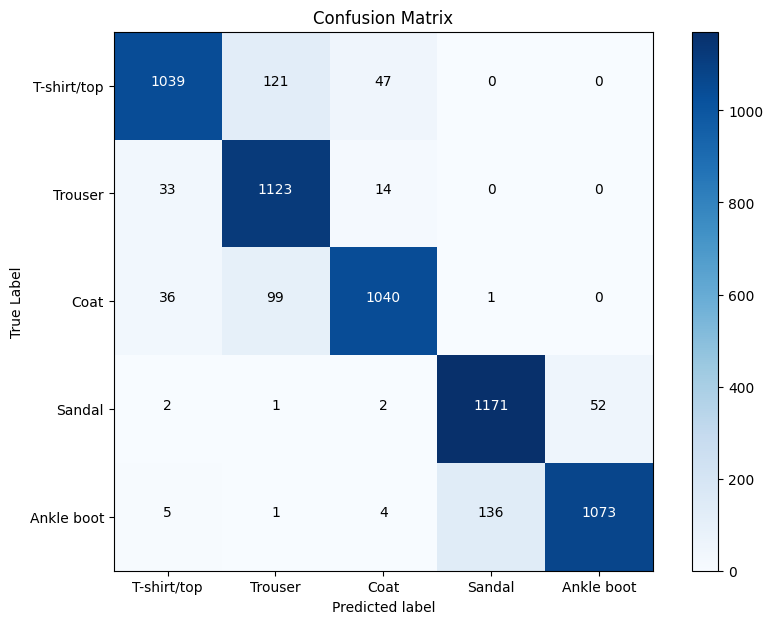

In [111]:
# b :

test_num_classes = len(np.unique(test_labels))
test_labels = np.asarray(test_labels, dtype=int)
test_predictions = np.asarray(test_predictions, dtype=int)

test_conf_matrix = calculate_confusion_matrix(test_labels, test_predictions, test_num_classes)
plot_confusion_matrix(test_conf_matrix, class_names)